### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 6
### Due: Friday, Oct 13 at 11:59 pm CT

## Problem 1

This week also we have only one problem worth 20 points. This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw6_data.npy`. This is a (50 x 2) numpy array, with measurements in the first column and uncertainties in the second column. Using the analytic results for heteroscedastic Gaussian data from lectures, compute the sample mean and the standard error on the sample mean from for this data.

2) Using the bootstrap method, generate $1000$ bootstrap realizations of this dataset. *DO NOT use the `astroML` code. Write your own bootstrap function from scratch. Also recall that when resampling data, measurements and uncertainties should stay paired together.*

3) Compute sample mean for all $1000$ boostrap datasets to find the distribution of the sample mean. Plot a normalized histogram of these bootstrap means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

4) Write a code to generate $50$ Jackknife datasets using the Jackknife method with one leave-off.  *DO NOT use the `astroML` code*. 

5) Compute sample mean for all $50$ Jackknife datasets to find the distribution of the sample mean. Plot a normalized histogram of these Jackknife means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

In [513]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from scipy import optimize
import pandas as pd 

In [514]:
data = np.load('../../homeworks/hw_data/hw6_data.npy')
df = pd.DataFrame(data, columns = ['x', 'unc'])

df_s = df.sort_values(by=['x'], axis=0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_s)

           x       unc
85  0.410368  1.522731
87  1.351475  1.913486
61  1.537624  1.731853
2   1.669820  1.971207
9   1.894194  1.405550
1   1.988243  1.402627
10  2.042031  1.308414
67  2.200433  1.002998
55  2.459220  1.257886
8   2.494012  1.224851
30  2.585048  1.409370
43  2.841793  0.710612
35  2.889111  1.634034
93  2.930120  1.467662
77  2.933305  1.567289
65  2.942397  1.484369
40  2.950012  1.725852
0   2.972077  0.938065
69  3.069751  0.526849
97  3.080222  1.012284
39  3.090993  0.990635
80  3.102295  0.643419
84  3.134829  1.786210
24  3.144479  1.514028
57  3.146532  0.774818
32  3.150742  0.516556
83  3.158110  0.511404
28  3.189376  1.417504
99  3.198800  1.050583
81  3.220284  1.737074
51  3.235192  1.056283
31  3.280762  0.781743
90  3.287021  1.194330
4   3.385415  1.296987
86  3.465622  0.888050
53  3.529824  0.573795
72  3.583023  1.429627
18  3.663263  0.513303
82  3.674462  0.505355
16  3.686688  0.969583
6   3.692901  1.062770
74  3.693132  1.738670
75  3.86250

In [515]:
x = data[:,0] #Measurements
unc = data[:,1] #Uncertainties

Sample mean = 3.917992034606058, Standard error on mean = 0.09481084100510956


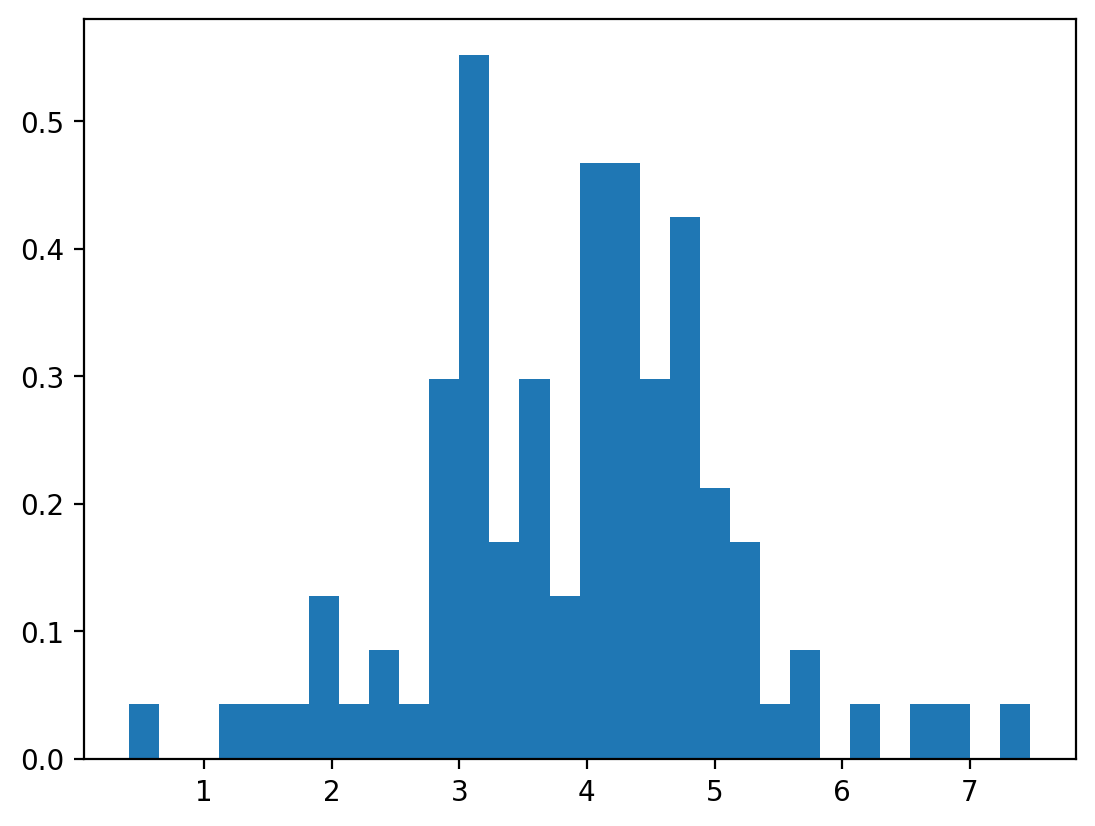

In [516]:
#1
#Sample mean, xbar and std dev, S

N = data.shape[0]

def hetero_mean(x, sigma):
    num = sum(x/sigma**2)
    den = sum(1/sigma**2)
    
    return num/den

def hetero_std(sigma):
    return (sum(1/sigma**2))**(-1/2)



xbar = hetero_mean(x, unc)
sigma_xbar = hetero_std(unc)

print(f'Sample mean = {xbar}, Standard error on mean = {sigma_xbar}')

px, bins, _ = plt.hist(x, 30, density=True);

In [517]:
# tup = [(r[0], r[1]) for r in data]
# tup

In [518]:
#2
def bootstrap(data, n, seed=123):
    '''
    Bootstrap a NX2 input array into N copies of NX2 arrays

    Parameters
    ----------
    x : Input data, 1D array
    n : int, No. of bootstrap copies

    Returns
    -------
    2D array

    '''
    N = len(data)
    tup = [(r[0], r[1]) for r in data]

    rng = np.random.default_rng(seed=seed)
    xx = rng.choice(tup, size=(n,N), replace=True)

    return xx

n=1000
xx = bootstrap(data, n)

print(xx.shape)


(1000, 100, 2)


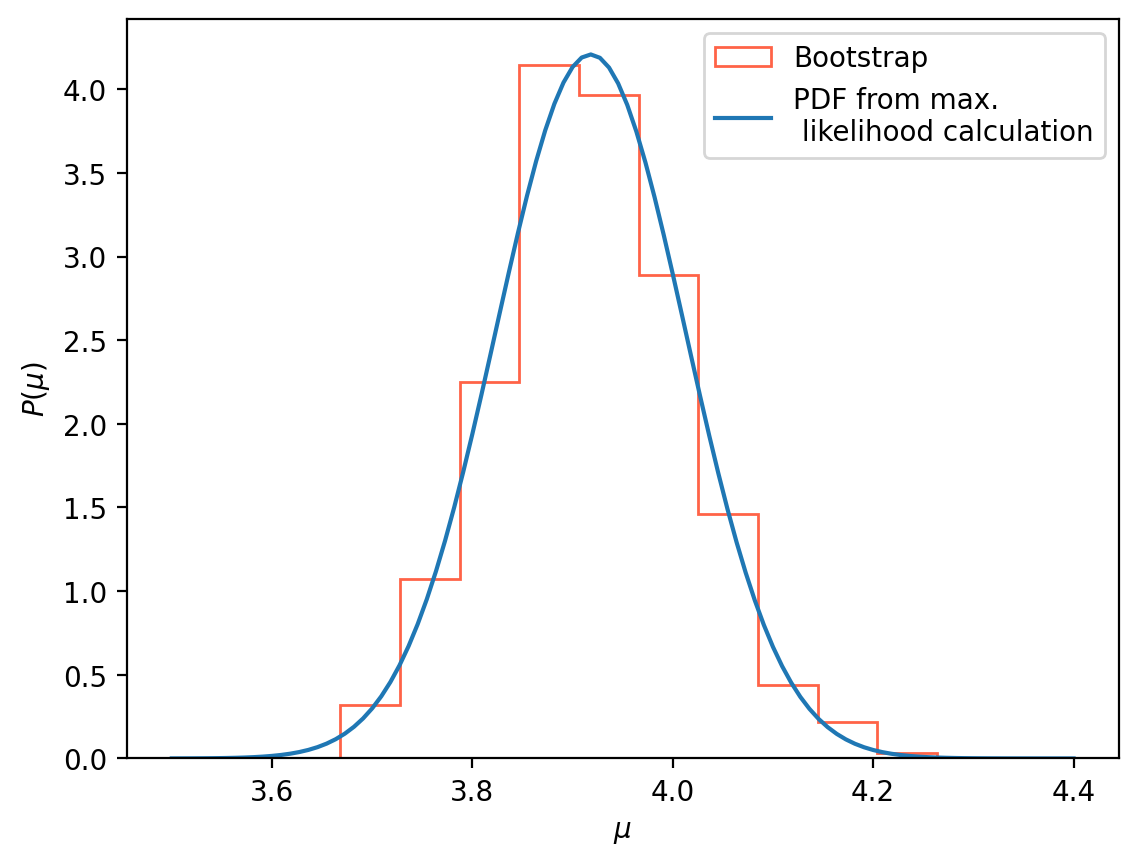

In [519]:
#3 
mean_arr = np.zeros(n)
for ii in range(n):
    #mean_arr[ii] = np.mean(xx[ii,:,0])
    mean_arr[ii] = hetero_mean(xx[ii,:,0], xx[ii,:,1])

fig, ax = plt.subplots()
ax.hist(mean_arr, 10,density=True, color='tomato', histtype='step', label='Bootstrap');
ax.set_xlabel('$\mu$')
ax.set_ylabel('$P(\mu)$')


xgrid = np.linspace(3.5,4.4,100)
ax.plot(xgrid, norm.pdf(xgrid, loc=xbar, scale=sigma_xbar), label = 'PDF from max.\n likelihood calculation' )
plt.legend(loc = 'upper right')

The calculations agree well with the distribution obtained from bootstrap

In [528]:
#4
#Jackknife

# n=50
# k = 1
# rng = np.random.default_rng(seed=10)
# u = rng.integers(0, N, size= (n,k))

# Xjk = np.zeros((n, N-k))
# for ii in range(n):
#     Xjk_add = np.delete(x, u[ii])
#     Xjk[ii,:] = Xjk_add

# mean_arr_jk = np.mean(Xjk, axis=1)

# mu_N = np.mean(x)

# del_mu = (n-1) * (mu_N - mean_arr_jk)

# mu_J = mu_N + del_mu

# del_mu

In [529]:
#5
# fig, ax = plt.subplots()
# ax.hist(mu_J, 'fd', density=True, color='tomato', histtype='step', label='Jackknife');
# ax.set_xlabel('$\mu$')
# ax.set_ylabel('$P(\mu)$')


# xgrid = np.linspace(3.5,4.4,100)
# ax.plot(xgrid, norm.pdf(xgrid, loc=xbar, scale=sigma_xbar), label = 'PDF from max.\n likelihood calculation' )
# plt.legend(loc = 'upper right')

In [530]:
#4
#Jackknife 

n=50
k = 1
rng = np.random.default_rng(seed=10)

mean_arr_J = []
for i in range(n):
    u = rng.integers(0,N)
    df_new = df.drop(u)
    
    mean_arr_J.append(hetero_mean(df_new['x'], df_new['unc']))

mu_N = xbar

mu_J2 = mu_N + (N-1) * (mu_N - mean_arr_J)

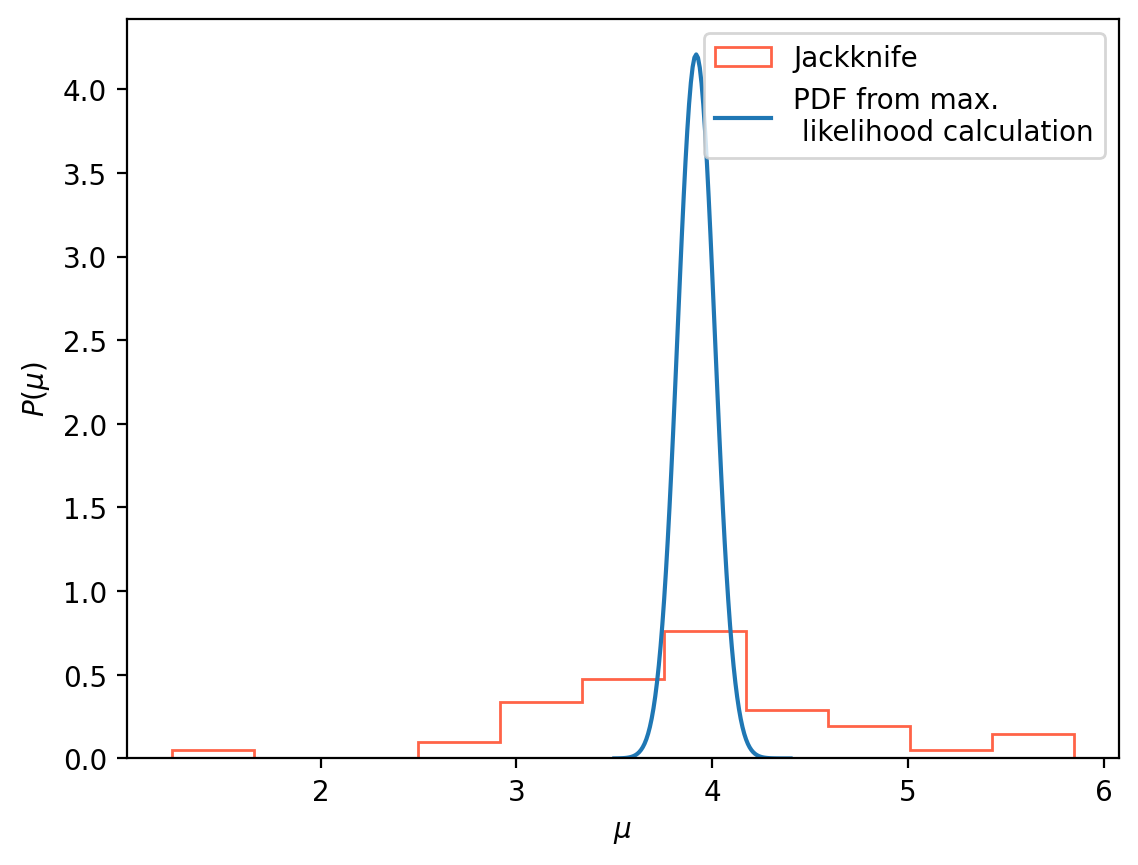

In [531]:
fig, ax = plt.subplots()
ax.hist(mu_J2, 'fd', density=True, color='tomato', histtype='step', label='Jackknife');
ax.set_xlabel('$\mu$')
ax.set_ylabel('$P(\mu)$')


xgrid = np.linspace(3.5,4.4,100)
ax.plot(xgrid, norm.pdf(xgrid, loc=xbar, scale=sigma_xbar), label = 'PDF from max.\n likelihood calculation' )
plt.legend(loc = 'upper right')

Jackknife distribution is not in good agreement with the calculated distribution